In [1]:
!uv pip install pandas numpy seaborn ipython plotly geopandas cartogram

Audited 7 packages in 45ms


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

# import xarray as xr
# import cartopy.crs as ccrs
# from cartopy.feature import NaturalEarthFeature
from matplotlib.ticker import FuncFormatter



# ============================================================================
# GLOBAL PLOT STYLING CONFIGURATION
# ============================================================================
# Define consistent color scheme
PLOT_COLORS = {
    "text_primary": "#111827",  # Dark gray for titles and primary text
    "text_secondary": "#374151",  # Medium gray for axis labels
    "text_tertiary": "#6b7280",  # Light gray for tick labels
    "grid": "#e5e7eb",  # Very light gray for grid lines
    "background": "white",  # White background
    "edge": "#e5e7eb",  # Edge color for legends/frames
    "bar_edge": "white",  # Edge color for bars
}

# Define consistent font settings
PLOT_FONTS = {
    "family": "DejaVu Sans",
    "size_base": 11,  # Base font size
    "size_title": 20,  # Title font size
    "size_label": 14,  # Axis label font size
    "size_tick": 12,  # Tick label font size
    "size_annotation": 12,  # Annotation/text font size
    "size_legend": 12,  # Legend font size
    "weight_title": "bold",  # Bold for titles (matplotlib string)
    "weight_label": "medium",  # Medium for labels (matplotlib string)
    "weight_tick": "normal",  # Normal for ticks (matplotlib string)
    "weight_annotation": "semibold",  # Semi-bold for annotations
    "weight_legend": "normal",  # Normal for legend
}

# Define consistent layout settings
PLOT_LAYOUT = {
    "figsize": (12, 8),  # Default figure size
    "dpi": 100,  # Resolution
    "pad": 2.0,  # Padding for tight_layout
    "left": 0.1,  # Left margin
    "right": 0.95,  # Right margin
    "top": 0.9,  # Top margin
    "bottom": 0.15,  # Bottom margin
    "labelpad": 15,  # Label padding
    "tick_pad": 8,  # Tick label padding
    "title_pad": 30,  # Title padding
}

# Define consistent line/edge settings
PLOT_LINES = {
    "grid_linewidth": 1.0,  # Grid line width
    "grid_alpha": 0.7,  # Grid line alpha
    "bar_edgewidth": 2.0,  # Bar edge line width
    "spine_linewidth": 0.0,  # Spine line width (hidden)
}

# Apply comprehensive global matplotlib settings
plt.rcParams.update(
    {
        # Font settings
        "font.family": PLOT_FONTS["family"],
        "font.size": PLOT_FONTS["size_base"],
        "font.weight": PLOT_FONTS["weight_tick"],
        # Figure settings
        "figure.dpi": PLOT_LAYOUT["dpi"],
        "figure.facecolor": PLOT_COLORS["background"],
        "figure.edgecolor": PLOT_COLORS["edge"],
        # Axes settings
        "axes.facecolor": PLOT_COLORS["background"],
        "axes.edgecolor": PLOT_COLORS["edge"],
        "axes.labelcolor": PLOT_COLORS["text_secondary"],
        "axes.labelweight": PLOT_FONTS["weight_label"],
        "axes.labelsize": PLOT_FONTS["size_label"],
        "axes.titlesize": PLOT_FONTS["size_title"],
        "axes.titleweight": PLOT_FONTS["weight_title"],
        "axes.titlecolor": PLOT_COLORS["text_primary"],
        "axes.titlepad": PLOT_LAYOUT["title_pad"],
        "axes.labelpad": PLOT_LAYOUT["labelpad"],
        # Spines settings
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        # Note: spine linewidth must be set per-spine, not via rcParams
        # Tick settings - use text_secondary for all tick labels for consistency
        "xtick.color": PLOT_COLORS["text_secondary"],
        "ytick.color": PLOT_COLORS[
            "text_secondary"
        ],  # Changed from text_tertiary for consistency
        "xtick.labelsize": PLOT_FONTS["size_tick"],
        "ytick.labelsize": PLOT_FONTS["size_tick"],
        "xtick.labelcolor": PLOT_COLORS["text_secondary"],
        "ytick.labelcolor": PLOT_COLORS[
            "text_secondary"
        ],  # Changed from text_tertiary for consistency
        "xtick.major.pad": PLOT_LAYOUT["tick_pad"],
        "ytick.major.pad": PLOT_LAYOUT["tick_pad"],
        # Grid settings
        "grid.color": PLOT_COLORS["grid"],
        "grid.alpha": PLOT_LINES["grid_alpha"],
        "grid.linewidth": PLOT_LINES["grid_linewidth"],
        "grid.linestyle": "-",
        "axes.grid": True,
        "axes.grid.axis": "y",
        "axes.axisbelow": True,
        # Legend settings
        "legend.fontsize": PLOT_FONTS["size_legend"],
        "legend.frameon": True,
        "legend.framealpha": 1.0,
        "legend.facecolor": PLOT_COLORS["background"],
        "legend.edgecolor": PLOT_COLORS["edge"],
        "legend.labelcolor": PLOT_COLORS["text_secondary"],
        # Text settings
        "text.color": PLOT_COLORS["text_primary"],
    }
)

# Set seaborn theme with consistent settings (aligned with matplotlib)
sns.set_theme(
    style="whitegrid",
    font=PLOT_FONTS["family"],
    font_scale=PLOT_FONTS["size_base"] / 10,  # Normalize font scale
    rc={
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
    },
)


def apply_consistent_style(
    ax, title=None, xlabel=None, ylabel=None, title_pad=None, show_grid=True
):
    """
    Apply consistent styling to a matplotlib axes object.
    This function complements the global rcParams settings.

    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The axes object to style
    title : str, optional
        Plot title
    xlabel : str, optional
        X-axis label
    ylabel : str, optional
        Y-axis label
    title_pad : float, optional
        Padding for title (defaults to PLOT_LAYOUT['title_pad'])
    show_grid : bool, optional
        Whether to show grid (default: True)
    """
    # Set title with consistent styling
    if title:
        ax.set_title(
            title,
            fontsize=PLOT_FONTS["size_title"],
            fontweight=PLOT_FONTS["weight_title"],
            color=PLOT_COLORS["text_primary"],
            pad=title_pad if title_pad is not None else PLOT_LAYOUT["title_pad"],
        )

    # Set labels with consistent styling
    if xlabel is not None:  # Allow empty string
        ax.set_xlabel(
            xlabel,
            fontsize=PLOT_FONTS["size_label"],
            fontweight=PLOT_FONTS["weight_label"],
            color=PLOT_COLORS["text_secondary"],
            labelpad=PLOT_LAYOUT["labelpad"],
        )

    if ylabel:
        ax.set_ylabel(
            ylabel,
            fontsize=PLOT_FONTS["size_label"],
            fontweight=PLOT_FONTS["weight_label"],
            color=PLOT_COLORS["text_secondary"],
            labelpad=PLOT_LAYOUT["labelpad"],
        )

    # Grid styling (consistent with rcParams)
    if show_grid:
        ax.grid(
            True,
            axis="y",
            color=PLOT_COLORS["grid"],
            linestyle="-",
            linewidth=PLOT_LINES["grid_linewidth"],
            alpha=PLOT_LINES["grid_alpha"],
        )
        ax.grid(False, axis="x")
    else:
        ax.grid(False)

    ax.set_axisbelow(True)

    # Ensure spines are hidden (consistent with rcParams)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_linewidth(PLOT_LINES["spine_linewidth"])

    # Tick styling (consistent with rcParams)
    # Ensure all tick labels use consistent colors
    ax.tick_params(
        axis="y",
        colors=PLOT_COLORS[
            "text_secondary"
        ],  # Changed to text_secondary for consistency
        labelcolor=PLOT_COLORS["text_secondary"],
        labelsize=PLOT_FONTS["size_tick"],
        pad=PLOT_LAYOUT["tick_pad"],
    )
    ax.tick_params(
        axis="x",
        colors=PLOT_COLORS["text_secondary"],
        labelcolor=PLOT_COLORS["text_secondary"],
        labelsize=PLOT_FONTS["size_tick"],
        pad=PLOT_LAYOUT["tick_pad"],
    )


def create_figure(figsize=None, **subplots_adjust_kwargs):
    """
    Create a figure with consistent layout settings.

    Parameters:
    -----------
    figsize : tuple, optional
        Figure size (defaults to PLOT_LAYOUT['figsize'])
    **subplots_adjust_kwargs : dict
        Additional arguments for fig.subplots_adjust()

    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    if figsize is None:
        figsize = PLOT_LAYOUT["figsize"]

    fig, ax = plt.subplots(figsize=figsize)

    # Apply default layout with option to override
    default_adjust = {
        "left": PLOT_LAYOUT["left"],
        "right": PLOT_LAYOUT["right"],
        "top": PLOT_LAYOUT["top"],
        "bottom": PLOT_LAYOUT["bottom"],
    }
    default_adjust.update(subplots_adjust_kwargs)
    fig.subplots_adjust(**default_adjust)

    return fig, ax


Saved lossless vector PDF: ./out/2_swe_bench_verified_performance.pdf


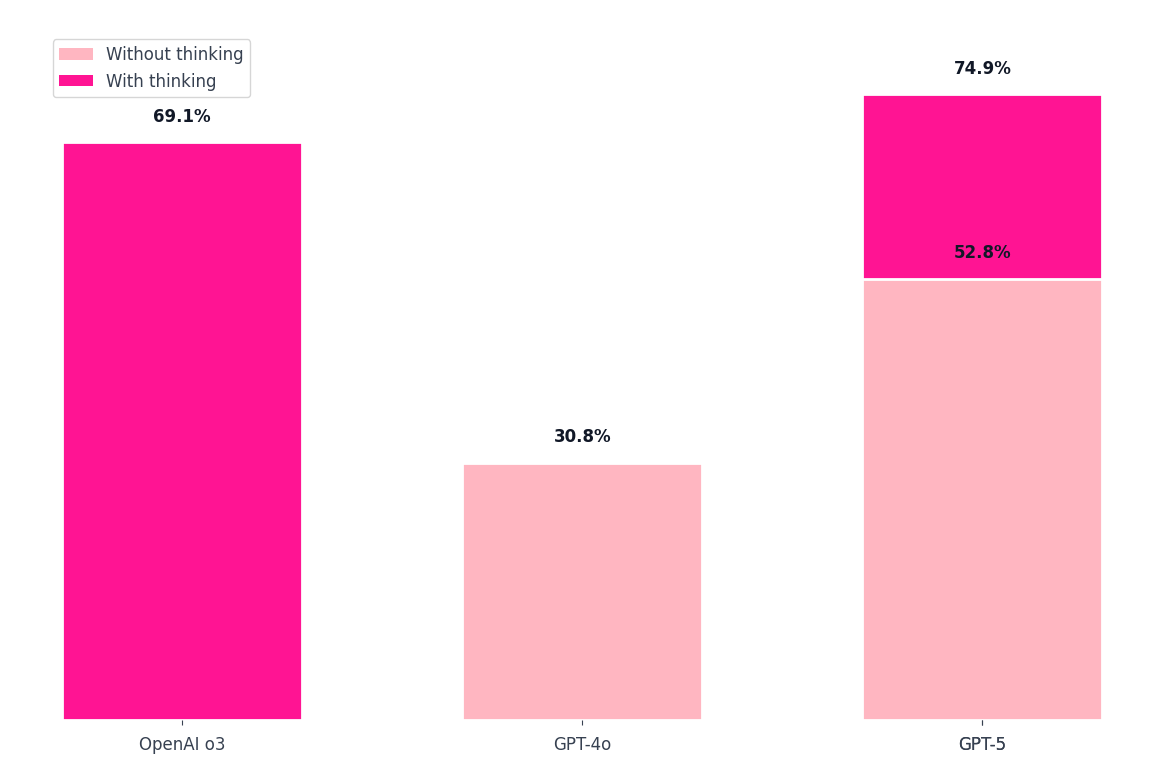

In [3]:


# SWE-bench Verified Results
models = [ 'OpenAI o3','GPT-4o','GPT-5 (fast)', 'GPT-5']
scores = [ 69.1,30.8,  52.8, 74.9]
thinking_models = [True, False, False, True]  # True for thinking models, False for non-thinking

# Create DataFrame
df = pd.DataFrame({
    'Model': models,
    'Score': scores,
    'Thinking': thinking_models
})

# Set modern color palette - light pink for non-thinking, dark pink for thinking
colors = ['#FFB6C1' if not thinking else '#FF1493' for thinking in thinking_models]

# Create figure with consistent styling
plt.style.use('default')
fig, ax = plt.subplots(figsize=PLOT_LAYOUT['figsize'])
fig.subplots_adjust(
    left=PLOT_LAYOUT['left'],
    right=PLOT_LAYOUT['right'],
    top=PLOT_LAYOUT['top'],
    bottom=PLOT_LAYOUT['bottom']
)

# Create modern bar plot with overlapping bars - draw bar 4 first, then bar 3 over it
bar_width = 0.6
x_positions = [0, 1, 2,2]  # Position 3 and 4 overlap at 2.5

# Draw bars individually to control order - bar 4 first (GPT-5), then bar 3 (GPT-5 fast) on top
bars = []
for i in [0, 1, 3, 2]:  # Draw in order: GPT-4o, OpenAI o3, GPT-5, then GPT-5 (fast) on top
    bar = ax.bar(x_positions[i], scores[i], width=bar_width, color=colors[i], 
                 edgecolor=PLOT_COLORS['bar_edge'], linewidth=PLOT_LINES['bar_edgewidth'])
    bars.append(bar)

# Add value labels on top of bars with consistent spacing
for i, (pos, score) in enumerate(zip(x_positions, scores)):
    ax.text(pos, score + 2, f'{score}%', ha='center', va='bottom', 
            fontsize=PLOT_FONTS['size_annotation'], 
            fontweight=PLOT_FONTS['weight_annotation'], 
            color=PLOT_COLORS['text_primary'])

# Apply consistent styling using helper function
apply_consistent_style(
    ax,
    # title='SWE-bench Verified: AI Model Performance',
    # ylabel='Accuracy (%)',
    xlabel=''
)

# Set custom x-tick labels and positions with consistent styling
ax.set_xticks(x_positions)
ax.set_xticklabels(models, rotation=0, 
                   color=PLOT_COLORS['text_secondary'],
                   fontsize=PLOT_FONTS['size_tick'])

# Add legend with consistent styling
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFB6C1', label='Without thinking'),
    Patch(facecolor='#FF1493', label='With thinking')
]
legend = ax.legend(
    handles=legend_elements,
    loc='upper left',
    ncol=1,
    bbox_to_anchor=(0.03, 0.97),
    fontsize=PLOT_FONTS['size_legend'],
    labelcolor=PLOT_COLORS['text_secondary']  # Explicitly set legend text color
)
# Ensure legend text uses consistent color
for text in legend.get_texts():
    text.set_color(PLOT_COLORS['text_secondary'])

# Set y-axis range and ticks
ax.set_ylim(0, 85)
ax.set_yticks([])

plt.tight_layout(pad=PLOT_LAYOUT['pad'])


os.makedirs('./out', exist_ok=True)

# Save to PDF using PdfPages for lossless, non-rasterized quality
pdf_path = './out/2_swe_bench_verified_performance.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

print(f"Saved lossless vector PDF: {pdf_path}")

plt.show()


Saved climate change visualization to: ./out/4_climate_change_visualization.pdf


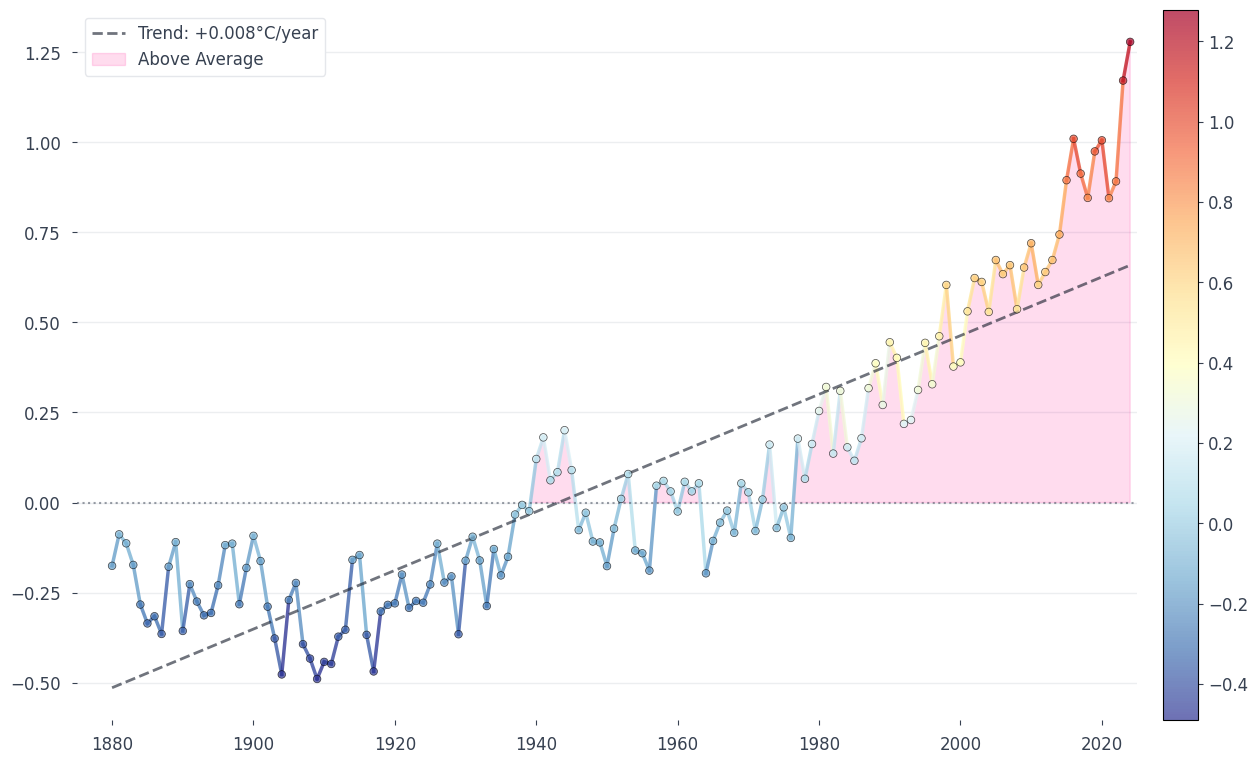

In [4]:
# https://data.giss.nasa.gov/gistemp/

temp_df = pd.read_csv("datasets/nasaGis.csv", skiprows=1)

temp_df.columns

# Drop seasonal columns
temp_df = temp_df.drop(columns=["J-D", "D-N", "DJF", "MAM", "JJA", "SON"])

temp_df.head()

# Calculate annual average temperature anomaly from monthly data
monthly_cols = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
# Convert monthly columns to numeric, handling non-numeric values (like "***") as NaN
for col in monthly_cols:
    temp_df[col] = pd.to_numeric(temp_df[col], errors="coerce")
# Calculate mean, ignoring NaN values
temp_df["Annual_Avg"] = temp_df[monthly_cols].mean(axis=1, skipna=True)

# Filter out rows with incomplete data (like 2025) and NaN values
temp_df = temp_df[(temp_df["Year"] <= 2024) & (temp_df["Annual_Avg"].notna())].copy()

# Create climate change visualization
fig, ax = create_figure(figsize=(14, 8))

# Plot temperature anomaly over time
years = temp_df["Year"].values
temps = temp_df["Annual_Avg"].values

# Create color gradient based on temperature (cooler = blue, warmer = red)
colors = plt.cm.RdYlBu_r((temps - temps.min()) / (temps.max() - temps.min()))

# Plot line with color gradient
for i in range(len(years) - 1):
    ax.plot(
        [years[i], years[i + 1]],
        [temps[i], temps[i + 1]],
        color=colors[i],
        linewidth=2.5,
        alpha=0.8,
    )

# Add scatter points for emphasis
scatter = ax.scatter(
    years,
    temps,
    c=temps,
    cmap="RdYlBu_r",
    s=30,
    alpha=0.7,
    edgecolors="black",
    linewidths=0.5,
    zorder=5,
)

# Add trend line using numpy polyfit
z = np.polyfit(years, temps, 1)
p = np.poly1d(z)
trend_line = ax.plot(
    years,
    p(years),
    "--",
    color=PLOT_COLORS["text_primary"],
    linewidth=2,
    alpha=0.6,
    label=f"Trend: +{z[0]:.3f}°C/year",
    zorder=4,
)

# # Highlight recent warming period (2000-2024)
# recent_mask = (years >= 2000) & (years <= 2024)
# ax.fill_between(years[recent_mask], temps[recent_mask],
#                 alpha=0.15, color='#FF1493', zorder=1, label='Recent warming (2000-2024)')

warming_mask = temps > 0
ax.fill_between(
    years,
    temps,
    where=warming_mask,
    alpha=0.15,
    color="#FF1493",
    interpolate=True,
    label="Above Average",
)

# Add reference line at 0°C anomaly
ax.axhline(
    y=0,
    color=PLOT_COLORS["text_secondary"],
    linestyle=":",
    linewidth=1.5,
    alpha=0.5,
    zorder=2,
)

# # Add annotations for key milestones
# # Find warmest year
# warmest_idx = np.argmax(temps)
# warmest_year = years[warmest_idx]
# warmest_temp = temps[warmest_idx]
# ax.annotate(f'Warmest: {warmest_year}\n({warmest_temp:.2f}°C)',
#             xy=(warmest_year, warmest_temp),
#             xytext=(warmest_year + 5, warmest_temp + 0.15),
#             fontsize=PLOT_FONTS['size_annotation'],
#             color=PLOT_COLORS['text_primary'],
#             fontweight=PLOT_FONTS['weight_annotation'],
#             bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
#                      edgecolor=PLOT_COLORS['edge'], alpha=0.9),
#             arrowprops=dict(arrowstyle='->', color=PLOT_COLORS['text_primary'],
#                           lw=1.5))

# Apply consistent styling
apply_consistent_style(
    ax,
    # title="Global Temperature Anomaly Over Time (1880-2024)",
    # xlabel="Year",
    # ylabel="Temperature Anomaly (°C)",
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)

cbar.ax.tick_params(
    labelsize=PLOT_FONTS["size_tick"],
    color=PLOT_COLORS["text_secondary"],
    labelcolor=PLOT_COLORS["text_secondary"],
)

# Add legend
legend = ax.legend(
    loc="upper left",
    fontsize=PLOT_FONTS["size_legend"],
    framealpha=1.0,
    facecolor=PLOT_COLORS["background"],
    edgecolor=PLOT_COLORS["edge"],
)
for text in legend.get_texts():
    text.set_color(PLOT_COLORS["text_secondary"])

# Format x-axis to show decades
ax.set_xticks(range(1880, 2025, 20))
ax.set_xlim(1875, 2025)

# Add statistics text box
# recent_avg = temps[recent_mask].mean()
# early_avg = temps[years < 1950].mean()
# warming = recent_avg - early_avg

# stats_text = f'Recent Average (2000-2024): {recent_avg:.2f}°C\n'
# stats_text += f'Early Average (1880-1949): {early_avg:.2f}°C\n'
# stats_text += f'Total Warming: {warming:.2f}°C'

# ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
#         fontsize=PLOT_FONTS['size_annotation'],
#         color=PLOT_COLORS['text_secondary'],
#         verticalalignment='top',
#         bbox=dict(boxstyle='round,pad=0.8', facecolor='white',
#                  edgecolor=PLOT_COLORS['edge'], alpha=0.9))

plt.tight_layout(pad=PLOT_LAYOUT["pad"])

# Save to PDF
os.makedirs("./out", exist_ok=True)
pdf_path = "./out/4_climate_change_visualization.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches="tight")

print(f"Saved climate change visualization to: {pdf_path}")

plt.show()


Saved black-and-white Apple revenue visualization to: ./out/5_apple_revenue_black_and_white.pdf


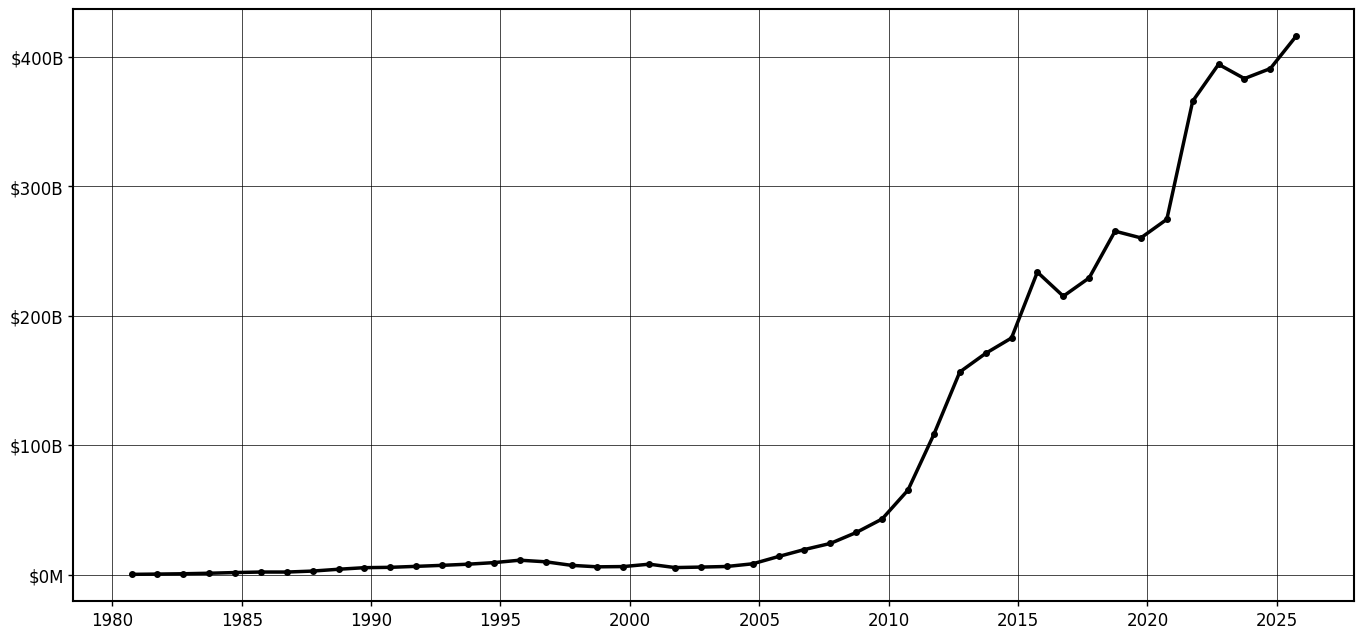

In [5]:
# 5. Create a black-and-white visualization (no grey levels)
# Make a graph of apple revenue over time use datasets/comp_na_daily_all.csv

# Load the dataset
df = pd.read_csv("datasets/comp_na_daily_all.csv")

# Filter for Apple (AAPL) data
aapl_df = df[df['tic'] == 'AAPL'].copy()

# Convert datadate to datetime
aapl_df['datadate'] = pd.to_datetime(aapl_df['datadate'])

# Sort by date
aapl_df = aapl_df.sort_values('datadate')

# Use 'sale' column for revenue (or 'revt' if 'sale' is not available)
# Check which column exists
if 'sale' in aapl_df.columns:
    revenue_col = 'sale'
elif 'revt' in aapl_df.columns:
    revenue_col = 'revt'
else:
    # Try to find any revenue-related column
    revenue_col = [c for c in aapl_df.columns if 'rev' in c.lower() or 'sale' in c.lower()][0]

# Filter out rows with missing revenue data
aapl_df = aapl_df[aapl_df[revenue_col].notna()].copy()

# Convert revenue to numeric (in case it's stored as string)
aapl_df[revenue_col] = pd.to_numeric(aapl_df[revenue_col], errors='coerce')

# Remove any rows that couldn't be converted
aapl_df = aapl_df[aapl_df[revenue_col].notna()].copy()

# Create black-and-white visualization (pure black and white, no grey)
fig, ax = plt.subplots(figsize=(14, 8))

# Plot revenue over time - use pure black color
ax.plot(aapl_df['datadate'], aapl_df[revenue_col], 
        color='black', linewidth=2.5, marker='o', markersize=4, 
        markerfacecolor='black', markeredgecolor='black')

# Set title and labels - all in black
# ax.set_title('Apple Revenue Over Time', 
#              fontsize=PLOT_FONTS['size_title'],
#              fontweight=PLOT_FONTS['weight_title'],
#              color='black', pad=PLOT_LAYOUT['title_pad'])
# ax.set_xlabel('Year', fontsize=PLOT_FONTS['size_label'],
#               fontweight=PLOT_FONTS['weight_label'],
#               color='black', labelpad=PLOT_LAYOUT['labelpad'])
# ax.set_ylabel('Revenue (Millions USD)', fontsize=PLOT_FONTS['size_label'],
#               fontweight=PLOT_FONTS['weight_label'],
#               color='black', labelpad=PLOT_LAYOUT['labelpad'])

# Style the plot - pure black and white
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Grid lines in black (but thin to maintain black-and-white aesthetic)
ax.grid(True, color='black', linestyle='-', linewidth=0.5, alpha=1.0)

# Spines in black
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.5)

# Ticks and labels in black
ax.tick_params(axis='both', which='major', labelsize=PLOT_FONTS['size_tick'],
               color='black', labelcolor='black', width=1)

# Format y-axis to show values in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1000:.0f}B' if x >= 1000 else f'${x:.0f}M'))

# Rotate x-axis labels for better readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')

xt, yt = ax.get_xticks(), ax.get_yticks()
ax.set_aspect((xt[1] - xt[0]) / (yt[1] - yt[0]))

plt.tight_layout(pad=PLOT_LAYOUT['pad'])

# Save to PDF
os.makedirs('./out', exist_ok=True)
pdf_path = './out/5_apple_revenue_black_and_white.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

print(f"Saved black-and-white Apple revenue visualization to: {pdf_path}")

plt.show()

Saved simple climate visualization to: ./out/5_climate_simple_visualization.pdf


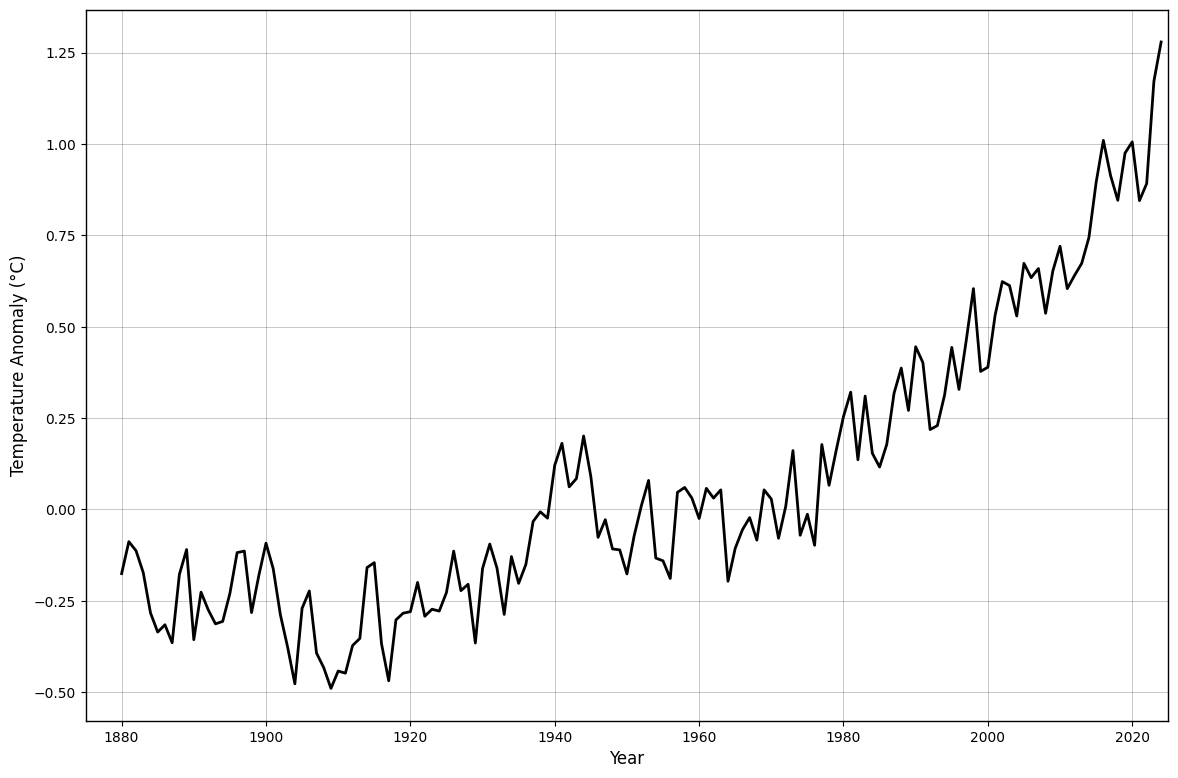

In [6]:

# Create a simple temperature over time visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Plot temperature anomalies
ax.plot(years, temps, color='black', linewidth=2)

# Set title and labels
# ax.set_title('Global Temperature Anomalies (1880-2024)', 
#              fontsize=16, fontweight='bold', color='black', pad=20)
ax.set_xlabel('Year', fontsize=12, color='black')
ax.set_ylabel('Temperature Anomaly (°C)', fontsize=12, color='black')

# Style the plot
ax.grid(True, alpha=0.3, color='black', linestyle='-', linewidth=0.5)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Style spines and ticks
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

ax.tick_params(axis='both', which='major', labelsize=10,
               color='black', labelcolor='black')

# Format x-axis to show decades
ax.set_xticks(range(1880, 2025, 20))
ax.set_xlim(1875, 2025)

plt.tight_layout(pad=1.5)

# Save to PDF
os.makedirs('./out', exist_ok=True)
pdf_path = './out/5_climate_simple_visualization.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

print(f"Saved simple climate visualization to: {pdf_path}")

plt.show()

In [7]:
# # https://data.giss.nasa.gov/gistemp/
# # https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756/

# xr_df = xr.open_dataset('datasets/gistemp250_GHCNv4.nc')
# xr_df


# #Downsample the time series to yearly frequency.
# climate = xr_df.resample(time='Y').mean()
# anomaly = climate['tempanomaly']

# #Creating a static image of the global temperature anomaly for a given year.
# cbar_kwargs = {
#     'orientation':'horizontal',
#     'fraction': 0.045,
#     'pad': 0.01,
#     'extend':'neither'
# }

# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
# ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
#                        facecolor='none', edgecolor='black')
# ax.set_extent([-150, 150, -55, 85])

# i=-1
# date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
# ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
# anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
#                vmin=-4, vmax=4, cmap='coolwarm',
#                cbar_kwargs=cbar_kwargs, interpolation='bicubic')
# plt.savefig("global_map.png", bbox_inches='tight', dpi=150)
# plt.show()



Fetching latest GDP data from World Bank...
Saved GDP treemap to: ./out/gdp_treemap.pdf


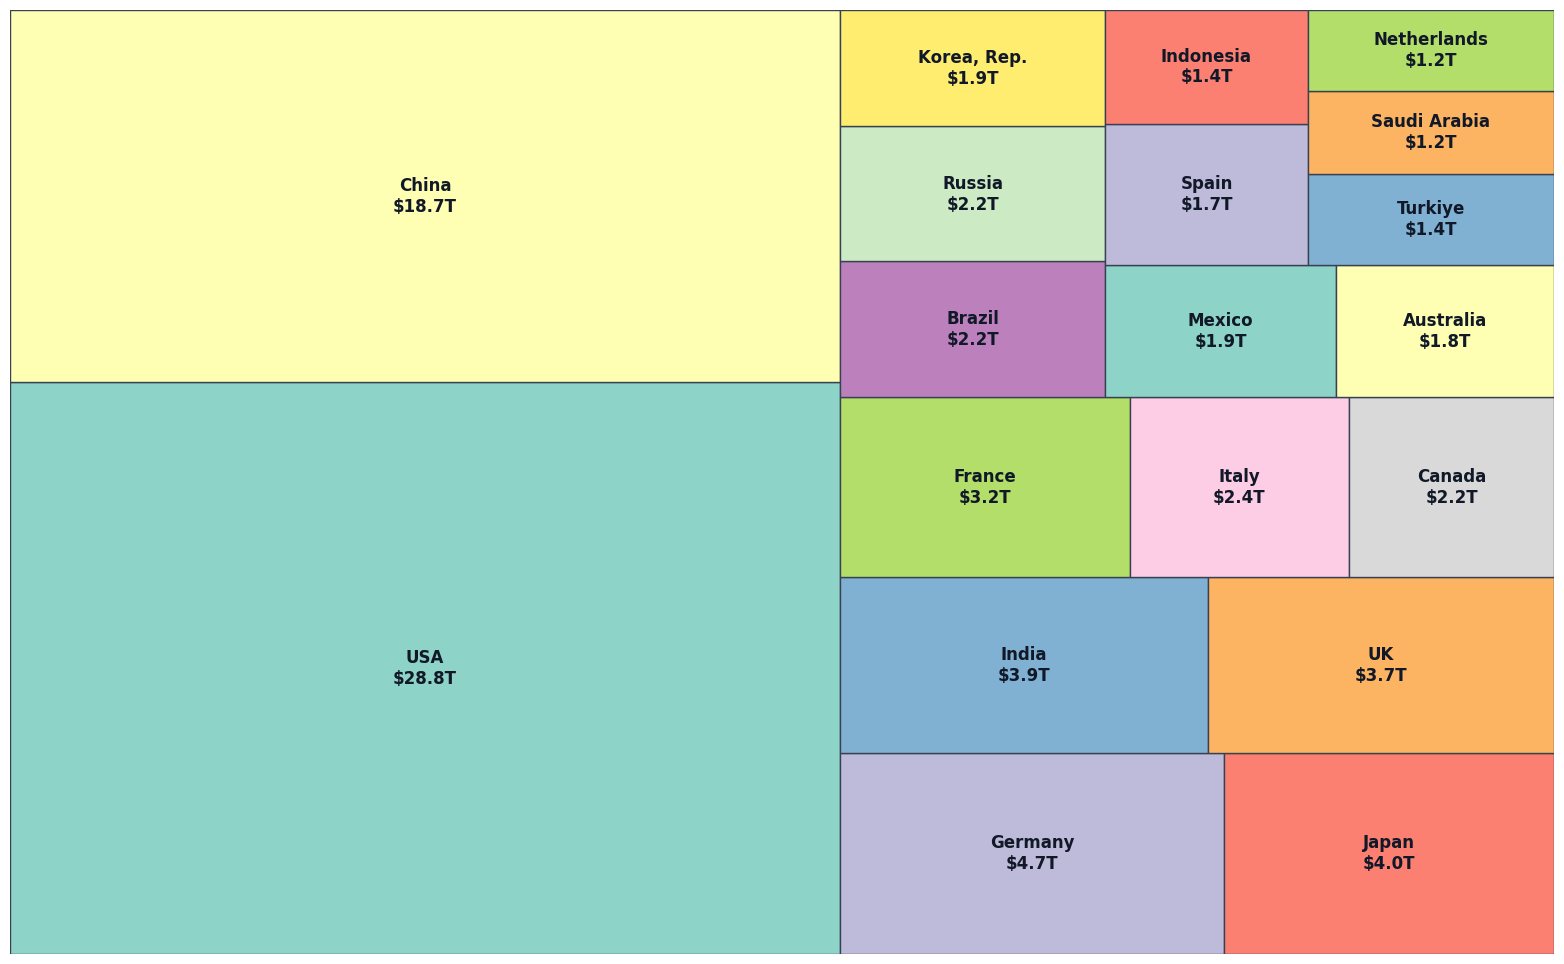

In [8]:
# pip install wbgapi pandas matplotlib squarify

import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import matplotlib
from matplotlib.patches import Rectangle

# --- 1. FETCH DATA (World Bank API) ---
print("Fetching latest GDP data from World Bank...")
df = wb.data.DataFrame('NY.GDP.MKTP.CD', time='all', mrv=1, labels=True)

# --- 2. CLEAN & PREPARE DATA ---
# Remove aggregates (like "World", "Euro Area")
economies = wb.economy.DataFrame()
aggregate_codes = economies[economies['aggregate'] == True].index
df_clean = df.drop(index=aggregate_codes, errors='ignore').dropna().reset_index()

# Rename columns
df_clean = df_clean.rename(columns={'economy': 'ISO Code', 'NY.GDP.MKTP.CD': 'GDP Value'})

# Filter to only economies with GDP >= 1 trillion
df_clean = df_clean[df_clean['GDP Value'] >= 1e12].copy()

# Sort by GDP
df_top = df_clean.sort_values(by='GDP Value', ascending=False)

# Create "Human Readable" labels for the box text
# e.g., "United States\n$27.3T"
def format_label(row):
    val = row['GDP Value']
    name = row['Country']
    
    # Shorten names for cleaner look
    if name == "United States": name = "USA"
    if name == "Russian Federation": name = "Russia"
    if name == "United Kingdom": name = "UK"
    
    val_str = f"${val/1e12:.1f}T"
        
    return f"{name}\n{val_str}"

df_top['Label'] = df_top.apply(format_label, axis=1)

# --- 3. VISUALIZE (Squarify) ---
# Create figure with consistent styling
fig, ax = create_figure(figsize=(16, 10))
fig.subplots_adjust(
    left=PLOT_LAYOUT['left'],
    right=PLOT_LAYOUT['right'],
    top=PLOT_LAYOUT['top'],
    bottom=PLOT_LAYOUT['bottom']
)

# Create a sequential color palette using magma
n_countries = len(df_top)
colors = sns.color_palette("Set3", n_countries)

# Plot treemap with no gaps (pad=False) and sequential colors
squarify.plot(
    sizes=df_top['GDP Value'], 
    label=df_top['Label'], 
    color=colors, 
    alpha=1.0,          # Full opacity
    pad=False,          # No gaps between boxes
    text_kwargs={
        'fontsize': PLOT_FONTS['size_annotation'], 
        'color': PLOT_COLORS['text_primary'], 
        'weight': PLOT_FONTS['weight_annotation']
    },  # Dark text matching consistent style
    ax=ax
)

# Add visible borders around each cell for better distinction
# Get all Rectangle patches from the axes (created by squarify.plot)
for patch in ax.patches:
    if isinstance(patch, Rectangle):
        # Use darker border color for better visibility
        patch.set_edgecolor(PLOT_COLORS['text_secondary'])  # '#374151' - medium gray
        patch.set_linewidth(1.0)  # Thicker border

ax.axis('off')  # Turn off the x/y axis

# Ensure background is white (consistent with other plots)
fig.patch.set_facecolor(PLOT_COLORS['background'])
ax.set_facecolor(PLOT_COLORS['background'])

plt.tight_layout(pad=PLOT_LAYOUT['pad'])

# Save to PDF
os.makedirs('./out', exist_ok=True)
pdf_path = './out/gdp_treemap.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

print(f"Saved GDP treemap to: {pdf_path}")

plt.show()

/var/folders/71/9gcn2rbd6nq3zdl6s0b1mdnr0000gn/T/ipykernel_3572/528532911.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


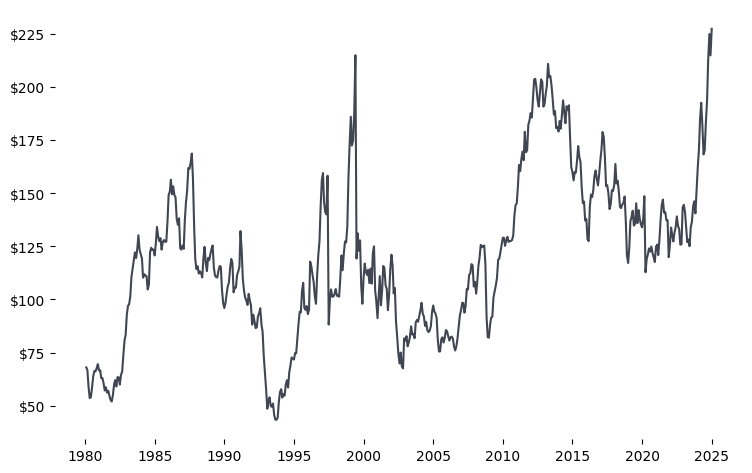

In [15]:

# Load data
ibm_ohlc = pd.read_csv("datasets/crsp_ibm_ohlc.csv", parse_dates=["DlyCalDt"])
ibm_ohlc = (
    ibm_ohlc
    .set_index("DlyCalDt")
    .resample("M")
    .mean(numeric_only=True)
    .reset_index()
)


# Create figure with maximum plot area (minimize margins for data-ink ratio)
fig, ax = plt.subplots(figsize=(8, 5))
fig.subplots_adjust(left=0.12, right=0.98, top=0.98, bottom=0.12)

# Plot line - pure data ink only
# Use dark color for maximum contrast (data-ink)
ax.plot(ibm_ohlc["DlyCalDt"], ibm_ohlc["DlyClose"], 
        color='#111827', linewidth=1.5, alpha=0.8)


# Erase all non-data-ink: remove all spines/borders
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
    ax.spines[spine].set_linewidth(0)

# Remove grid lines (non-data-ink)
ax.grid(False)


ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Save to PDF
os.makedirs("./out", exist_ok=True)
pdf_path = "./out/7_dataink.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches="tight")

plt.show()


Saved IBM correlation heatmap to: ./out/6_ibm_correlation_heatmap.pdf


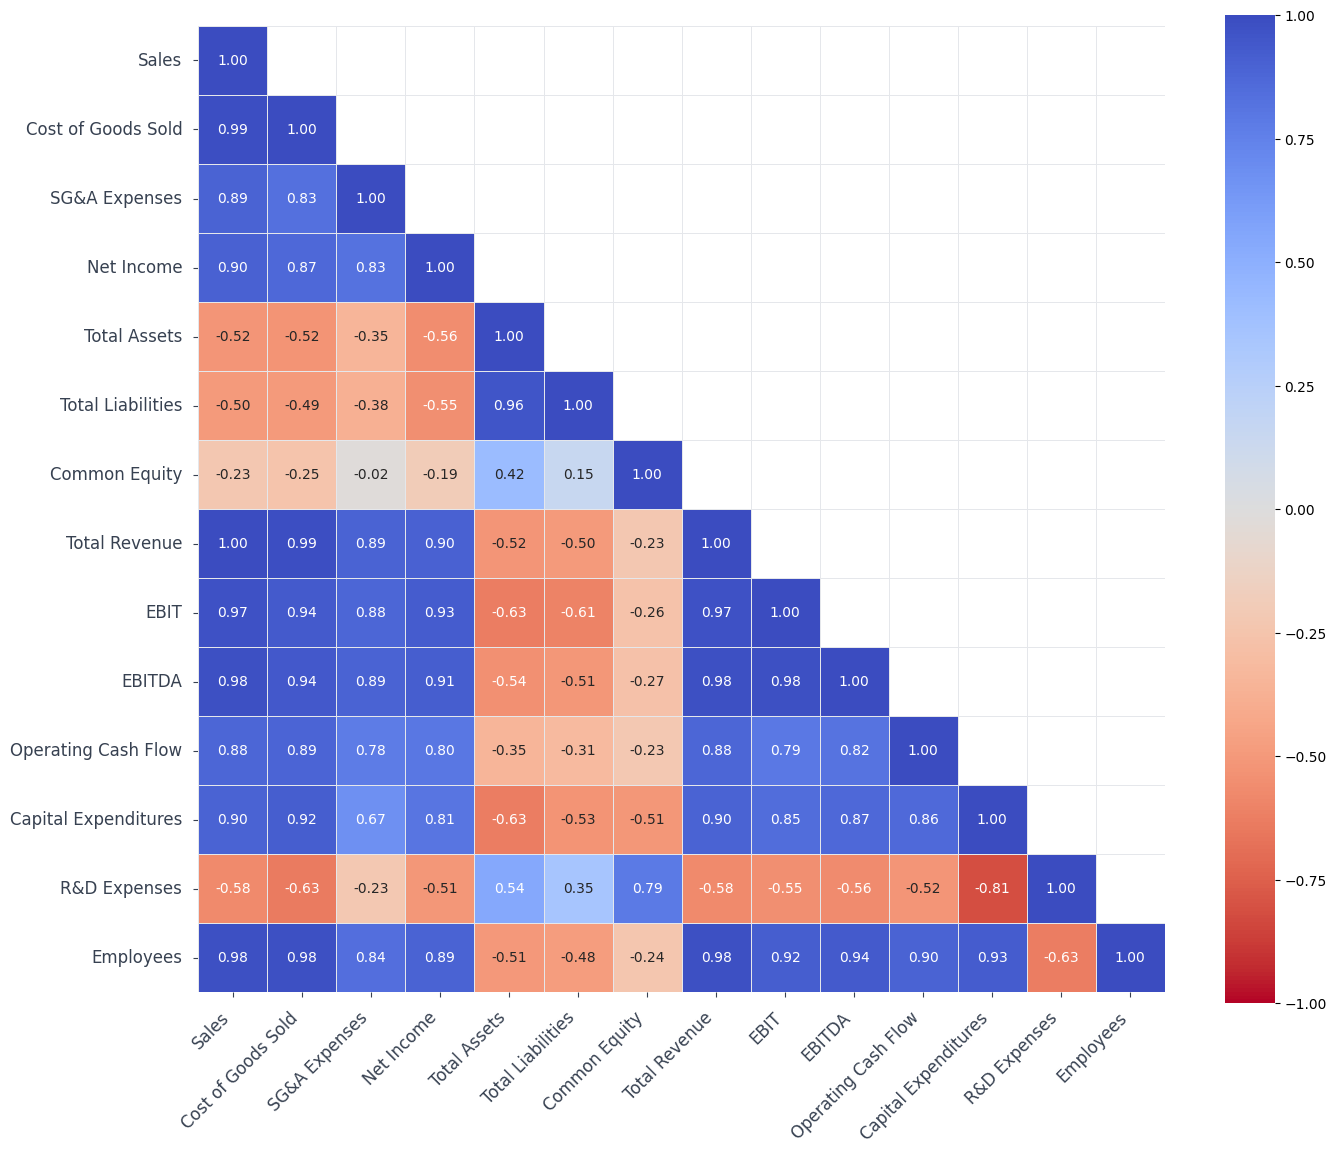

In [10]:
# Correlation Heatmap for IBM Financial Data

# Load data and filter for IBM
data = pd.read_csv("datasets/compustat_IBM_APPL_2010_2025.csv")
ibm_data = data[data['tic'] == 'IBM'].copy()

# Select key financial numeric columns for correlation analysis
financial_cols = [
    'sale',      # Sales/Revenue
    'cogs',      # Cost of Goods Sold
    'xsga',      # Selling, General & Administrative Expenses
    'ni',        # Net Income
    'at',        # Total Assets
    'lt',        # Total Liabilities
    'ceq',       # Common Equity
    'revt',      # Total Revenue
    'ebit',      # Earnings Before Interest and Taxes
    'ebitda',    # EBITDA
    'oancf',     # Operating Activities Net Cash Flow
    'capx',      # Capital Expenditures
    'xrd',       # Research and Development Expenses
    'emp',       # Employees
]

# Create mapping from variable names to proper labels
variable_labels = {
    'sale': 'Sales',
    'cogs': 'Cost of Goods Sold',
    'xsga': 'SG&A Expenses',
    'ni': 'Net Income',
    'at': 'Total Assets',
    'lt': 'Total Liabilities',
    'ceq': 'Common Equity',
    'revt': 'Total Revenue',
    'ebit': 'EBIT',
    'ebitda': 'EBITDA',
    'oancf': 'Operating Cash Flow',
    'capx': 'Capital Expenditures',
    'xrd': 'R&D Expenses',
    'emp': 'Employees',
}

# Filter to only include columns that exist in the dataset
available_cols = [col for col in financial_cols if col in ibm_data.columns]

# Select numeric columns and calculate correlation
ibm_numeric = ibm_data[available_cols].select_dtypes(include=[np.number])
corr_matrix = ibm_numeric.corr()

# Create mask for upper triangle (show only half of the symmetric matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Find top 5 correlations (excluding diagonal and duplicates)
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        corr_pairs.append((col1, col2, corr_value))



# Create figure with consistent styling (adjusted for text at bottom)
fig, ax = create_figure(figsize=(14, 12))

# Create heatmap using seaborn with mask to show only upper triangle
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm_r',  # Red to green colormap (red for -1, green for +1)
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    linecolor=PLOT_COLORS["edge"],
    cbar_kws={
        'label': '',
        'shrink': 1.0,  # Make colorbar same height as graph
        'aspect': 20,   # Control colorbar width
    },
    ax=ax
)

# Apply consistent styling
apply_consistent_style(
    ax,
    # title="IBM Financial Metrics Correlation Heatmap",
    xlabel="",  # Remove x-axis label
    ylabel="",  # Remove y-axis label
    show_grid=False
)

# Map variable names to proper labels for tick labels
tick_labels = [variable_labels.get(col, col) for col in corr_matrix.columns]
ax.set_xticklabels(tick_labels, rotation=45, ha='right')
ax.set_yticklabels(tick_labels, rotation=0)



plt.tight_layout(pad=PLOT_LAYOUT["pad"])

# Save to PDF
os.makedirs("./out", exist_ok=True)
pdf_path = "./out/6_ibm_correlation_heatmap.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches="tight")

print(f"Saved IBM correlation heatmap to: {pdf_path}")

plt.show()


Saved entertainment ratings chart to: ./out/9_entertainment_ratings.pdf


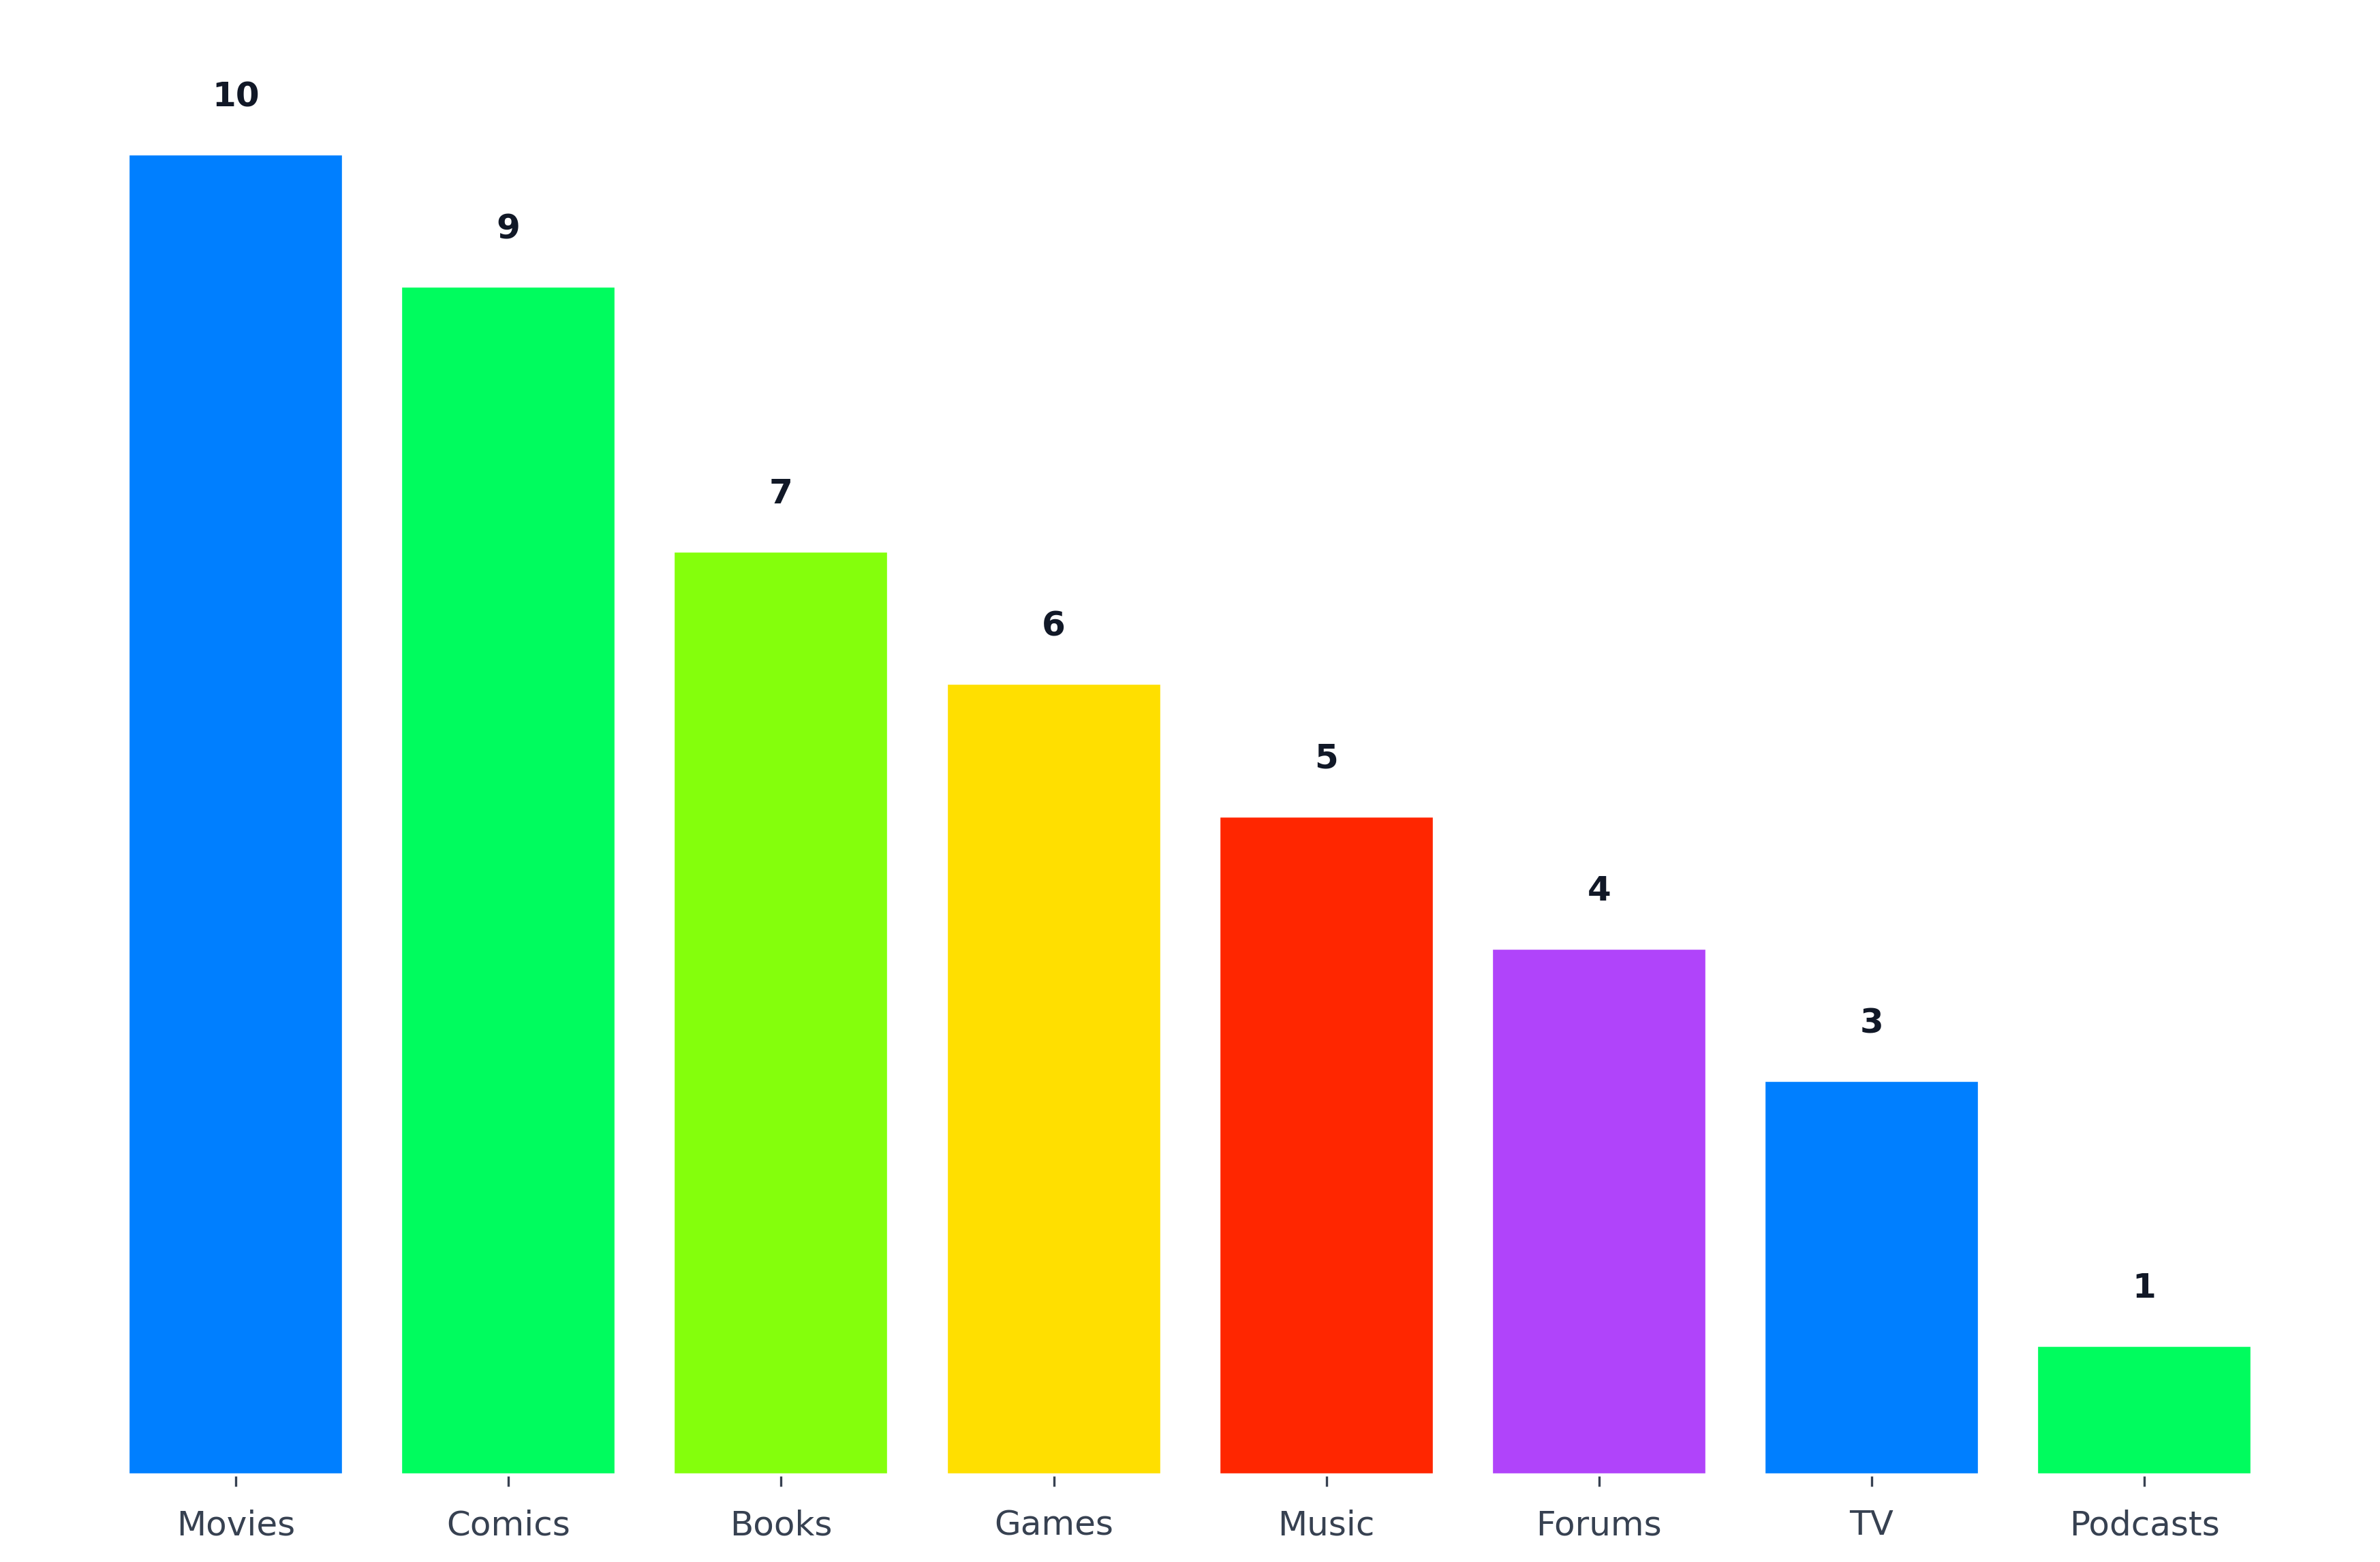

In [11]:
# My ratings of entertainment media out of 10

ratings = {
    "Movies": 10,
    "TV": 3,
    "Music": 5,
    "Books": 7,
    "Podcasts": 1,
    "Forums": 4,
    "Comics": 9,
    "Games": 6,
}

# Create figure with consistent styling and high DPI
fig, ax = create_figure(figsize=PLOT_LAYOUT['figsize'])
fig.set_dpi(300)  # High DPI for crisp output

# Explicitly set white background (consistent with graph 8)
fig.patch.set_facecolor(PLOT_COLORS['background'])
ax.set_facecolor(PLOT_COLORS['background'])

# Use built-in seaborn color palette (gist_ncar for vibrant colors)
color_palette = sns.color_palette('gist_ncar')

# Sort by rating value for better visual hierarchy
sorted_items = sorted(ratings.items(), key=lambda x: x[1], reverse=True)
sorted_categories = [item[0] for item in sorted_items]
sorted_values = [item[1] for item in sorted_items]


# Create bar plot with consistent styling
bars = ax.bar(
    range(len(sorted_categories)),
    sorted_values,
    color=color_palette,
    edgecolor=PLOT_COLORS['bar_edge'],
    linewidth=PLOT_LINES['bar_edgewidth']
)

# Add value labels on top of bars
for i, (pos, value) in enumerate(zip(range(len(sorted_categories)), sorted_values)):
    ax.text(
        pos, value + 0.3, f'{value}',
        ha='center', va='bottom',
        fontsize=PLOT_FONTS['size_annotation'],
        fontweight=PLOT_FONTS['weight_annotation'],
        color=PLOT_COLORS['text_primary']
    )

# Apply consistent styling (consistent with graph 8) - no grid
apply_consistent_style(
    ax,
    # title='Entertainment Media Ratings',
    # ylabel='Rating (out of 10)',
    xlabel='',
    show_grid=False
)

# Set custom x-tick labels and positions
ax.set_xticks(range(len(sorted_categories)))
ax.set_xticklabels(
    sorted_categories,
    rotation=0,
    ha='center',
    color=PLOT_COLORS['text_secondary'],
    fontsize=PLOT_FONTS['size_tick']
)

# Set y-axis range - remove ticks and labels
ax.set_ylim(0, 11)
ax.set_yticks([])
ax.set_yticklabels([])

plt.tight_layout(pad=PLOT_LAYOUT['pad'])

# Save to PDF with high DPI
os.makedirs('./out', exist_ok=True)
pdf_path = './out/9_entertainment_ratings.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight', dpi=300)

print(f"Saved entertainment ratings chart to: {pdf_path}")

plt.show()


Stats: Avg=5.30%, Min=2.39%, Max=11.36%
Saved to: ./out/10_europe_unemployment_map.pdf


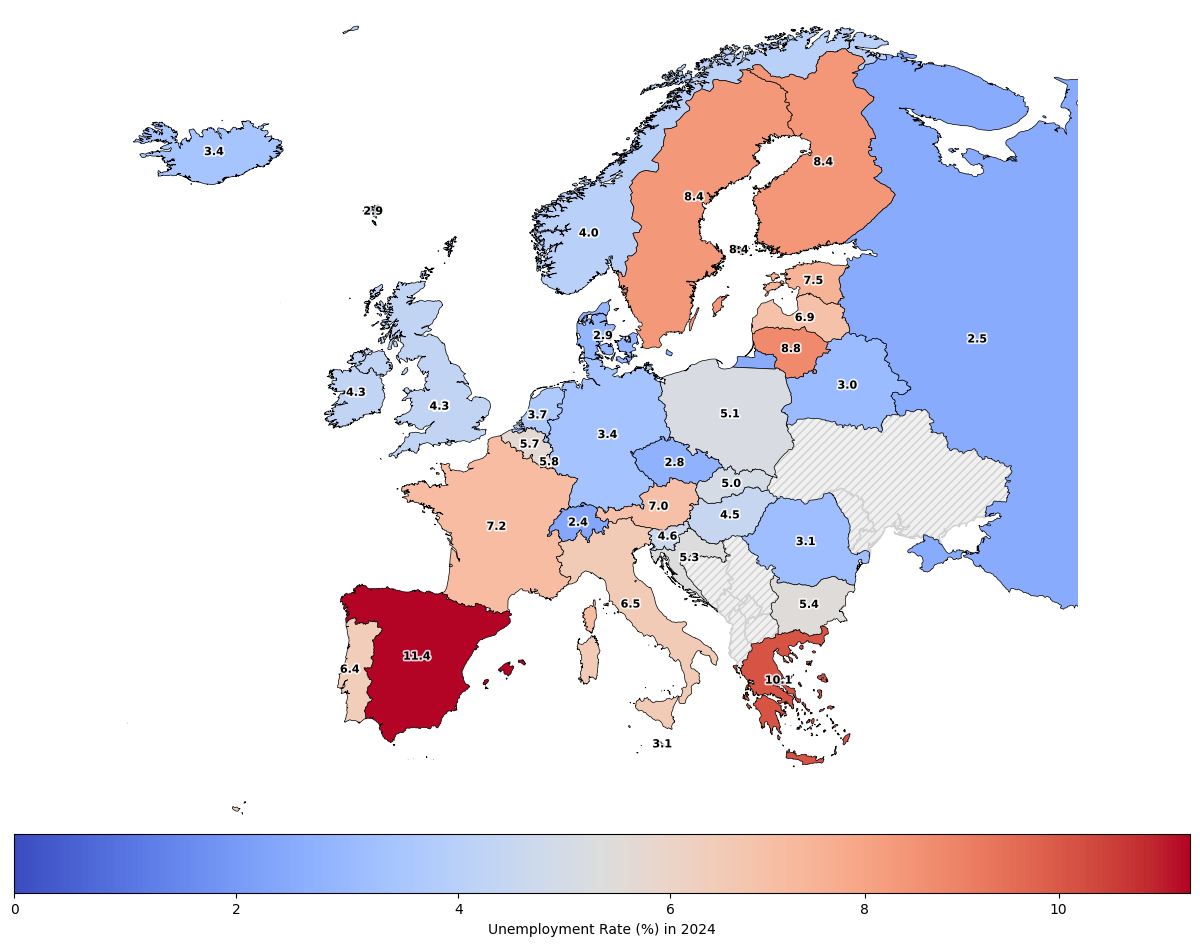

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib import patheffects
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path
import urllib.request
import zipfile
import os
import numpy as np # Imported for aspect ratio calculation

# --- CONFIGURATION ---
SCRIPT_DIR = Path(".").absolute()
DATA_DIR = SCRIPT_DIR / "datasets"
GEMDATA_URL = "https://datacatalogfiles.worldbank.org/ddh-published/0037798/DR0092042/GemDataEXTR.zip"
MAP_DATA_URL = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip"

X_MIN, X_MAX = -25, 45
Y_MIN, Y_MAX = 32, 72

# --- DATA HELPERS ---
def ensure_directories():
    os.makedirs(DATA_DIR, exist_ok=True)

def download_file(url: str, dest_path: Path):
    if not dest_path.exists():
        try:
            print(f"Downloading {url}...")
            urllib.request.urlretrieve(url, str(dest_path))
        except Exception as e:
            print(f"Failed to download {url}: {e}")
            raise

def extract_zip(zip_path: Path, extract_to: Path):
    try:
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall(extract_to)
    except Exception as e:
        print(f"Failed to extract {zip_path}: {e}")
        raise

# --- LOAD DATA ---
ensure_directories()

# 1. Map Data
map_zip = DATA_DIR / "ne_10m_admin_0_countries.zip"
if not map_zip.exists():
    download_file(MAP_DATA_URL, map_zip)

try:
    world = gpd.read_file(f"/vsizip/{map_zip}")
    europe_map = world[
        (world["CONTINENT"] == "Europe") & (world["SOVEREIGNT"] != "Turkey")
    ].copy()
except Exception as e:
    print(f"Error loading map: {e}")
    raise

# 2. Unemployment Data
gem_zip = DATA_DIR / "GemDataEXTR.zip"
excel_file = DATA_DIR / "Unemployment Rate, seas. adj..xlsx"
subdir_file = DATA_DIR / "GemDataEXTR" / "Unemployment Rate, seas. adj..xlsx"

if not (excel_file.exists() or subdir_file.exists()):
    download_file(GEMDATA_URL, gem_zip)
    extract_zip(gem_zip, DATA_DIR)

target_file = subdir_file if subdir_file.exists() else excel_file

if not target_file.exists():
    raise FileNotFoundError("Data file missing.")

df = pd.read_excel(target_file, header=0)
df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
df = df.drop(0)
df["Year"] = df["Year"].astype(int)

df_melted = df.melt(id_vars=["Year"], var_name="Country", value_name="Unemployment")
df_melted["Unemployment"] = (
    df_melted["Unemployment"]
    .astype(str)
    .str.replace(",", ".")
    .apply(pd.to_numeric, errors="coerce")
)

name_mapping = {
    "Russian Federation": "Russia",
    "Czech Republic": "Czechia",
    "North Macedonia": "Macedonia",
    "Bosnia and Herzegovina": "Bosnia and Herzegovina",
    "Slovak Republic": "Slovakia",
    "United Kingdom": "United Kingdom",
}
df_melted["Country_Map"] = df_melted["Country"].replace(name_mapping)

target_year = 2024
df_target = df_melted[df_melted["Year"] == target_year].copy()

merged = europe_map.merge(
    df_target, left_on="SOVEREIGNT", right_on="Country_Map", how="left"
)

# Statistics
euro_data = merged[merged["Unemployment"].notna()]
euro_min = euro_data["Unemployment"].min()
euro_max = euro_data["Unemployment"].max()
euro_mean = euro_data["Unemployment"].mean()

print(f"Stats: Avg={euro_mean:.2f}%, Min={euro_min:.2f}%, Max={euro_max:.2f}%")

max_deviation = max(abs(euro_max - euro_mean), abs(euro_min - euro_mean))
norm = TwoSlopeNorm(
    vmin=max(0, euro_mean - max_deviation),
    vcenter=euro_mean,
    vmax=euro_mean + max_deviation,
)

# --- PLOTTING ---
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

data_exists = merged[merged["Unemployment"].notna()]
no_data = merged[merged["Unemployment"].isna()]

if not no_data.empty:
    no_data.plot(ax=ax, color="#f0f0f0", edgecolor="#d0d0d0", hatch="////")

if not data_exists.empty:
    data_exists.plot(
        column="Unemployment",
        ax=ax,
        cmap="coolwarm",
        norm=norm,
        edgecolor="black",
        linewidth=0.5,
        legend=True,
        legend_kwds={
            "label": f"Unemployment Rate (%) in {target_year}",
            "orientation": "horizontal",
            "shrink": 0.8,
            "pad": 0.01,
            "aspect": 20,
        },
    )

    for _, row in data_exists.iterrows():
        if pd.isna(row["Unemployment"]):
            continue

        country = row["SOVEREIGNT"]
        coords = None
        if country == "Russia":
            coords = (37.6, 55.8)
        elif country == "France":
            coords = (2.2, 46.6)
        elif country == "Norway":
            coords = (9.0, 61.0)
        elif country == "United Kingdom":
            coords = (-2.0, 52.5)
        else:
            cent = row.geometry.centroid
            if X_MIN <= cent.x <= X_MAX and Y_MIN <= cent.y <= Y_MAX:
                coords = (cent.x, cent.y)

        if coords:
            txt = ax.text(
                coords[0],
                coords[1],
                f"{row['Unemployment']:.1f}",
                fontsize=8,
                fontweight="bold",
                ha="center",
                va="center",
                color="black",
            )
            txt.set_path_effects(
                [
                    patheffects.withStroke(
                        linewidth=2.5, foreground="white", alpha=0.8
                    )
                ]
            )

# --- FIX: CORRECT ASPECT RATIO ---
# Fix the "stretched" look by adjusting aspect ratio for Europe's latitude (~50 degrees)
# 1 / cos(50 degrees) is approximately 1.55
ax.set_aspect(1.5)

ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(Y_MIN, Y_MAX)
ax.set_axis_off()

plt.tight_layout()

os.makedirs("./out", exist_ok=True)
pdf_path = "./out/10_europe_unemployment_map.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches="tight")

print(f"Saved to: {pdf_path}")
plt.show()

Loading map data...
Winsorizing Density Colors:
 - Low Cutoff: 18.26
 - High Cutoff: 367.57
Calculating cartogram for 43 countries (All Europe ex. Russia)...
Saved to: ./out/europe_full_cartogram.pdf


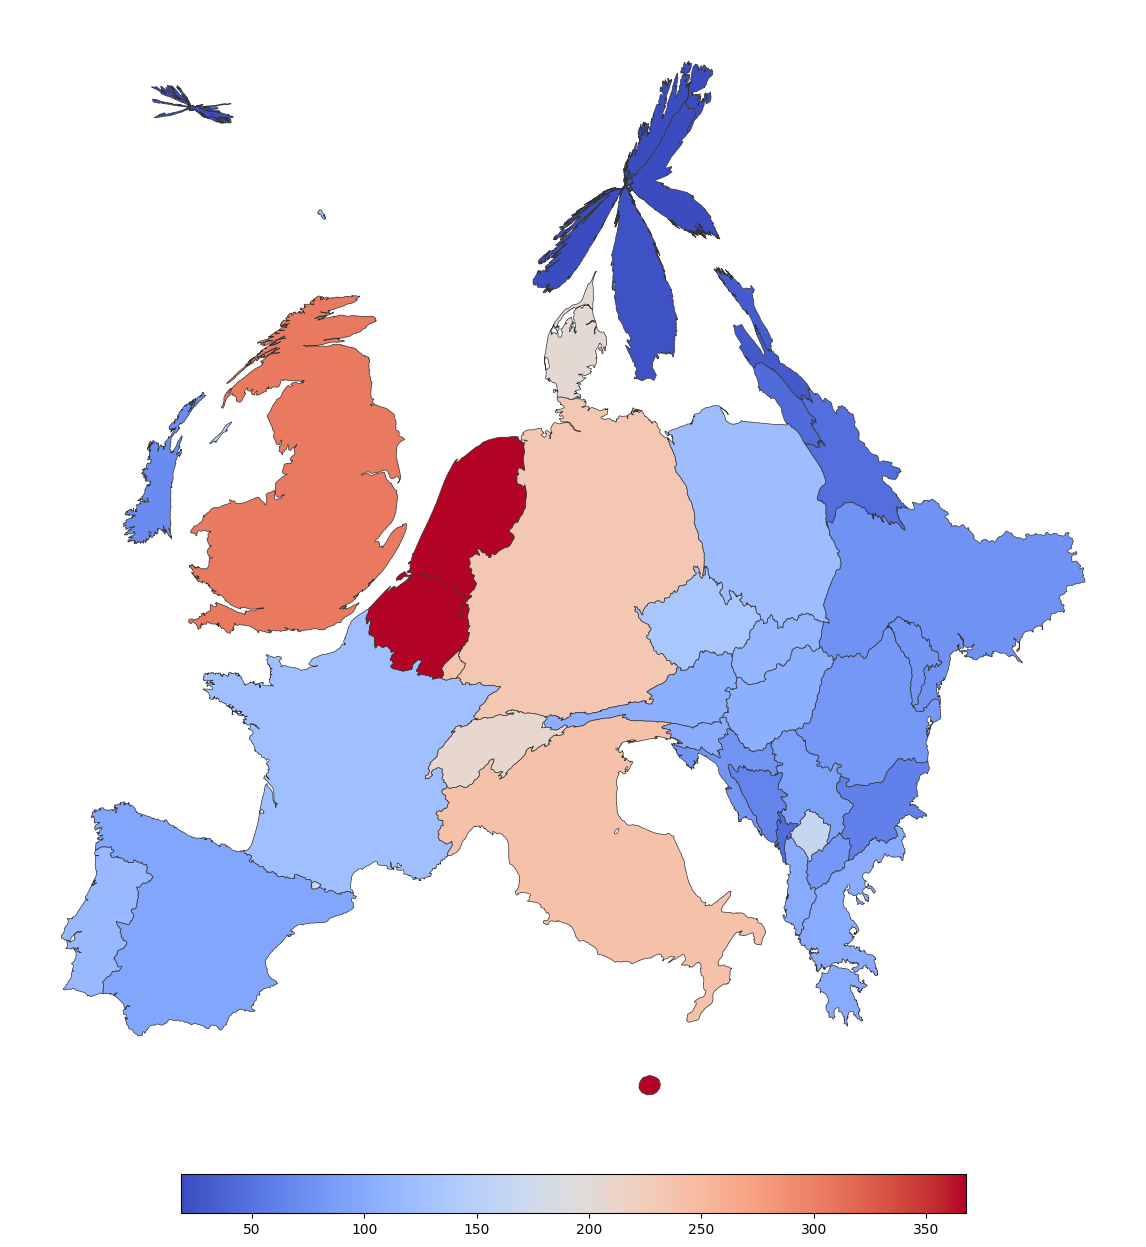

In [13]:
import geopandas as gpd
import pandas as pd
try:
    from cartogram import Cartogram
except ImportError:
    from cartogram_geopandas import make_cartogram as Cartogram
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path
from shapely.geometry import MultiPolygon
import os
import numpy as np

# --- CONTROL PANEL ---
DAMPING_FACTOR = 1.0      # 1.0 = Linear Scale (True Population size)
STIFFNESS = 0.05          # Low stiffness = Allow shape distortion
WINSOR_LIMITS = [0.05, 0.95] # Color saturation limits
# ---------------------

# 1. Load Data
data_dir = Path("./datasets")
map_zip = data_dir / "ne_10m_admin_0_countries.zip"
print("Loading map data...")
world = gpd.read_file(f"/vsizip/{map_zip}")

# 2. Pre-processing
pop_col = 'POP_EST'
world[pop_col] = pd.to_numeric(world[pop_col], errors='coerce')

# --- FILTERING FOR ALL EUROPE (Minus Russia) ---
# We select based on the 'CONTINENT' column usually present in Natural Earth data
# If 'CONTINENT' is missing, we fallback to a broader spatial clip or list, 
# but standard NE data has it.
if 'CONTINENT' in world.columns:
    europe = world[
        (world['CONTINENT'] == 'Europe') & 
        (world['NAME'] != 'Russia')
    ].copy()
else:
    # Fallback if CONTINENT column is missing (unlikely for NE data)
    print("Warning: 'CONTINENT' column not found. Using bounding box fallback.")
    europe = world.cx[-25:45, 30:75].copy()
    europe = europe[europe['NAME'] != 'Russia']

# Project to Equal Area (EPSG:3035) standard for Europe
europe = europe.to_crs("EPSG:3035")

# --- CLEANING GEOMETRY (Mainland Focus) ---
def keep_largest_polygon(geom):
    # This ensures we don't have French Guiana or tiny islands drifting away
    if isinstance(geom, MultiPolygon):
        return max(geom.geoms, key=lambda g: g.area)
    return geom

europe['geometry'] = europe.geometry.apply(keep_largest_polygon)
europe['area_km2'] = europe.geometry.area / 1e6
# Filter out tiny microstates that might break the topology (e.g. Vatican, Monaco)
# Keeping > 250 km2 keeps Malta but drops Vatican/Monaco
europe = europe[europe['area_km2'] > 250].copy() 

# 3. Calculate Metrics
europe['pop_density'] = europe[pop_col] / europe['area_km2']

# --- WINSORIZING COLORS ---
density_lower = europe['pop_density'].quantile(WINSOR_LIMITS[0])
density_upper = europe['pop_density'].quantile(WINSOR_LIMITS[1])

print(f"Winsorizing Density Colors:")
print(f" - Low Cutoff: {density_lower:.2f}")
print(f" - High Cutoff: {density_upper:.2f}")

# --- PREPARE CARTOGRAM TARGET ---
europe['metric'] = europe[pop_col]
europe['damped_metric'] = np.power(europe['metric'], DAMPING_FACTOR)

target_total = europe['damped_metric'].sum()
europe['target_norm'] = europe['damped_metric'] / target_total

area_total = europe.geometry.area.sum()
europe['area_norm'] = europe.geometry.area / area_total

europe['blended_metric'] = (
    (europe['target_norm'] * (1 - STIFFNESS)) + 
    (europe['area_norm'] * STIFFNESS)
)

europe['cartogram_target'] = europe['blended_metric'] * 1e6

print(f"Calculating cartogram for {len(europe)} countries (All Europe ex. Russia)...")

cartogram_gdf = Cartogram(
    europe, 
    cartogram_attribute='cartogram_target',
    max_iterations=20,
    max_average_error=0.05 
)

if not isinstance(cartogram_gdf, gpd.GeoDataFrame):
    if isinstance(cartogram_gdf, tuple):
        cartogram_gdf = cartogram_gdf[0]

# 4. Plotting
fig, ax = plt.subplots(1, 1, figsize=(16, 14)) # Slightly larger for broader map
fig.patch.set_facecolor('white')

cartogram_gdf.plot(
    ax=ax, 
    column='pop_density', 
    cmap='coolwarm',       
    vmin=density_lower,    
    vmax=density_upper,    
    edgecolor='#333333', 
    linewidth=0.5,
    legend=True,
    legend_kwds={
        # 'label': "Population Density (People per km²)",
        'orientation': "horizontal",
        'shrink': 0.5,
        'pad': 0.02
    }
)

ax.set_axis_off()
ax.set_title(""
)

plt.tight_layout()

os.makedirs('./out', exist_ok=True)
pdf_path = './out/europe_full_cartogram.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight', facecolor='white')

print(f"Saved to: {pdf_path}")
plt.show()